# Netflix Recommendation System

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset
df = pd.read_csv(r"D:\Users\DELL\Desktop\ML\Projects & Datasets\Movie_Recommendation\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.shape

(6234, 12)

# Exploratory Data Analysis

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [7]:
type = pd.get_dummies(df['type'], drop_first = True)
df = pd.concat([df, type], axis = 1)
df = df.drop(['type'], axis=1)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x: x['duration'].split(" ")[0] if "Season" in x['duration']
                             else "", axis=1)
df['duration'] = df.apply(lambda x: x['duration'].split(" ")[0] if "Season" not in x['duration']
                             else "", axis=1)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,TV Show,year_added,month_added,season_count
0,81145628,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,2019.0,9.0,
1,80117401,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0,2016.0,9.0,
2,70234439,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0,1
3,80058654,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0,1
4,80125979,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,0,2017.0,9.0,


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
show_id,6234.0,7.670368e+07,1.094296e+07,247747.0,80035801.75,80163367.0,80244888.75,81235729.0
release_year,6234.0,2.013359e+03,8.811620e+00,1925.0,2013.00,2016.0,2018.00,2020.0
TV Show,6234.0,3.158486e-01,4.648902e-01,0.0,0.00,0.0,1.00,1.0
year_added,6223.0,2.017983e+03,1.204851e+00,2008.0,2017.00,2018.0,2019.00,2020.0
month_added,6223.0,6.837538e+00,3.621890e+00,1.0,4.00,7.0,10.00,12.0


## Number of Movies and TV Series in the dataset

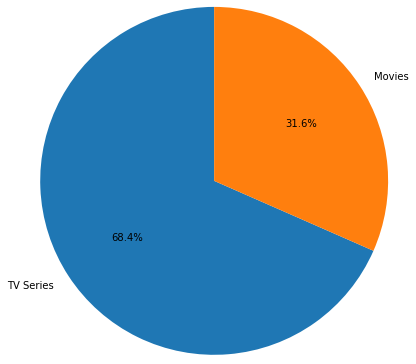

In [10]:
labels = {'Movies', 'TV Series'}
plt.pie(df.groupby(['TV Show']).size().values, 
        labels = labels,
        autopct = '%1.1f%%', radius=2, startangle=90)
plt.show()

## Content released over the years on Netflix

In [11]:
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) 

In [12]:
temp_df = df['release_year'].value_counts().reset_index()

trace = go.Bar(
                x = temp_df['index'],
                y = temp_df['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template='plotly_dark', title='CONTENT RELEASE OVER THE YEAR',
                      xaxis = dict(title = 'Release Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

## Content released over the years by content type

In [13]:
df1 = df[df['TV Show'] == 0]
df2 = df[df['TV Show'] == 1]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()

trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name = 'TV Shows',
                marker = dict(color = 'rgb(249,6,6)'))

trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = 'Movies',
                marker = dict(color = 'rgb(26,118,255)'))

layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

## Distribution of Movie Duration : Histogram

In [14]:
trace = go.Histogram(
                        x = df['duration'],
                        xbins = dict(size=0.5),
                        marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribution of Movies Duration', xaxis = dict(title = 'Minutes'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [15]:
temp_df = df['country'].value_counts().reset_index()[:20]

trace = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                 marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 COUNTIES WITH MOST CONTENT' , xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

## Data Cleaning

In [16]:
new_df = df[['title', 'director', 'cast', 'listed_in', 'description']]
new_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [17]:
new_df.dropna(inplace = True)

<ipython-input-17-6b34463e2f37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
new_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [19]:
# Initializing the new column
from rake_nltk import Rake
new_df['Key_words'] = ''

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary with key words as keys and their scores as values
    key_word_dict_scores = r.get_word_degrees()

    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_word_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

<ipython-input-19-9752f52be6ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ' '.join(row['director']).lower()
    
new_df.set_index('title', inplace = True)    

<ipython-input-20-908166ce6173>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-908166ce6173>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-908166ce6173>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
new_df.head()

,director,cast,listed_in,Key_words
title,,,,
Norm of the North: King Sized Adventure,"richard finn, tim maltby","[alanmarriott, andrewtoth, briandobson]","[children & family movies, comedies]","[planning, awesome, wedding, stolen, artifact,..."
#realityhigh,fernando lebrija,"[nestacooper, katewalsh, johnmichaelhiggins]",[comedies],"[ex, lands, social, media, celebrity, interest..."
Automata,gabe ibáñez,"[antoniobanderas, dylanmcdermott, melaniegriff...","[international movies, sci-fi & fantasy, thr...","[global, conspiracy, tech, company, investigat..."
Fabrizio Copano: Solo pienso en mi,"rodrigo toro, francisco schultz",[fabriziocopano],[stand-up comedy],"[fabrizio, copano, takes, audience, participat..."
Good People,henrik ruben genz,"[jamesfranco, katehudson, tomwilkinson]","[action & adventure, thrillers]","[apartment, luck, struggling, couple, neighbor..."


In [22]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

<ipython-input-22-e2307d7d96cb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
new_df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,"richard finn, tim maltby alanmarriott andrewto..."
#realityhigh,fernando lebrija nestacooper katewalsh johnmic...
Automata,gabe ibáñez antoniobanderas dylanmcdermott mel...
Fabrizio Copano: Solo pienso en mi,"rodrigo toro, francisco schultz fabriziocopano..."
Good People,henrik ruben genz jamesfranco katehudson tomwi...


In [30]:
new_df.to_csv("data.csv",index=False)